In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

from synthesize import SyntheticDataset

## Creating a Mouse Brain Cortex Dataset Generator

In [2]:
class SyntheticMouseBrainCortexDataset(SyntheticDataset):
    """Synthetic mouse brain cortex dataset.
    
    This class provides methods for initializing a semi-random mouse cortex spatial
    transcriptomics dataset, as well as methods to visualize aspects of the dataset.
    
    Data consists of 4 layers of widths [.35, .15, .25, .25]. Each layer has a
    unique excitatory neuronal type. There are three inhibitory neuronal
    types which have slight layer preferences. There are two layer-specific
    non-neuron types, one of which constitutes most of layer 2. There is a
    third non-neuron type, which is uniformly distributed throughout.
    0 - Excitatory L1
    1 - Excitatory L2
    2 - Excitatory L3
    3 - Excitatory L4
    4 - Inhibitory 1
    5 - Inhibitory 2
    6 - non-Neuron L1
    7 - non-Neuron (ubiquitous)

    Metagenes
    0 - Excitatory
    1 - In
    2 - Inhibitory-1
    3 - Inhibitory-2
    4 - non-Neuron 1
    5 - non-Neuron 2
    6 - L1
    7 - L2
    8 - L3
    9 - L4
    10 - end - random
    """
    
    distributions = np.array([
        [0.33, 0, 0, 0, 0.1, 0, 0.5, 0.07],
        [0, 0.93, 0, 0, 0, 0, 0, 0.07],
        [0, 0, 0.53, 0, 0.1, 0.3, 0, 0.07],
        [0, 0, 0, 0.73, 0.1, 0.1, 0, 0.07]
    ])
    
    cell_type_definitions = np.array([
        [   # Layer 1
            [1, 0, 0, 0, 0, 0, 0.6, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0.6, 0, 0, 0, 0.3, 0, 0, 0], # Inhibitory 1
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0.3, 0, 0, 0], # Non-Neuron 2
            [0, 0, 0, 0, 1, 0, 0.3, 0, 0, 0] 
        ],
        [   # Layer 2
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0.6, 0, 0], # Excitatory L2
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0.3, 0, 0]   
        ],
        [   # Layer 3
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0.6, 0], # Excitatory L3
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0.6, 0, 0, 0, 0, 0, 0.3, 0], # Inhibitory 1
            [0, 1, 0, 0.6, 0, 0, 0, 0, 0.3, 0], # Inhibitory 2
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0.3, 0]   
        ],
        [   # Layer 4
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0.6], # Excitatory L4
            [0, 1, 0.6, 0, 0, 0, 0, 0, 0, 0.3], # Inhibitory 1
            [0, 1, 0, 0.6, 0, 0, 0, 0, 0, 0.3], # Inhibitory 2
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0.3]   
        ]
    ])
    
    layer_widths = [0.35, 0.15, 0.25, 0.25]
    layer_endpoints = np.cumsum(layer_widths)
    
    mask_conditions = [
        (lambda coordinates: coordinates[:, 0] < SyntheticMouseBrainCortexDataset.layer_endpoints[0]),
        (lambda coordinates: (coordinates[:, 0] >= SyntheticMouseBrainCortexDataset.layer_endpoints[0])
             & (coordinates[:, 0] < SyntheticMouseBrainCortexDataset.layer_endpoints[1])),
        (lambda coordinates: (coordinates[:, 0] >= SyntheticMouseBrainCortexDataset.layer_endpoints[1])
             & (coordinates[:, 0] < SyntheticMouseBrainCortexDataset.layer_endpoints[2])),
        (lambda coordinates: coordinates[:, 0] >= SyntheticMouseBrainCortexDataset.layer_endpoints[2])
    ]
    
    metagene_variation_probabilities = [0, 0.25, 0, 0.25, 0, 0.25, 0, 0.1, 0.1, 0.1]
    
    def __init__(self, parameters, parent_directory, shared_metagenes=None, key=''):
        super().__init__(SyntheticMouseBrainCortexDataset.distributions,
                         SyntheticMouseBrainCortexDataset.cell_type_definitions,
                         SyntheticMouseBrainCortexDataset.mask_conditions,
                         SyntheticMouseBrainCortexDataset.metagene_variation_probabilities,
                         parameters, parent_directory, shared_metagenes=None, key='')

## Generating Datasets

In [3]:
# Create Datasets
instances = 2
parent_directory = "./synthetic_data"
parameters_options = [{'n_cells': 500, 'n_genes': 100, 'num_replicates': 16,
             'sigX_scale': 3.0, 'sigY_scale': 2.0,
             'real_metagene_parameter': 4.0, 'noise_metagene_parameter': 8.0, 'lambda_s': 1.0,
             'gene_replace_prob': 0.0, 'element_replace_prob': 0.0,
             "num_real_metagenes":10, 'n_noise_metagenes': 3, 'num_shared_metagenes': 5}]

datasets = []
for parameters in parameters_options:
    for instance in range(instances):
        dataset = SyntheticMouseBrainCortexDataset(parameters, parent_directory)
        datasets.append(dataset)
        dataset.save_pickle()
        dataset.reformat()

Synthesizing M...
Synthesizing X, A, and p...
Synthesizing Y...
Finished
Synthesizing M...
Synthesizing X, A, and p...
Synthesizing Y...
Finished


## Plotting Datasets

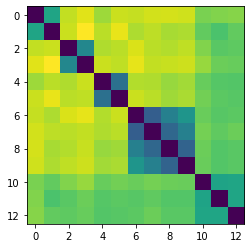

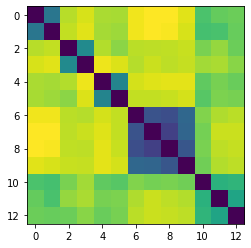

In [4]:
for instance in range(instances):
    dataset = datasets[instance]
    plt.figure()
    plt.imshow(pairwise_distances(dataset.metagenes.T))
    plt.show()
    plt.close()

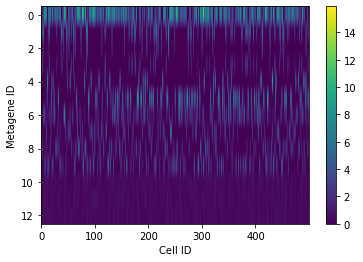

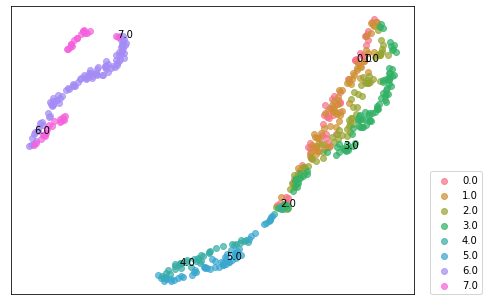

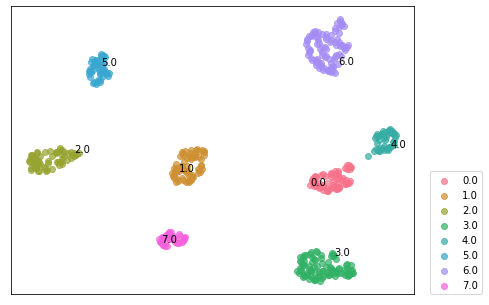

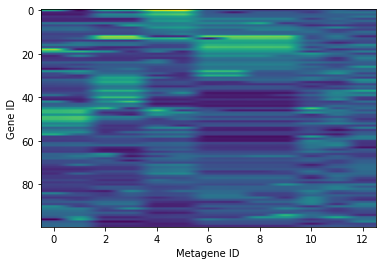

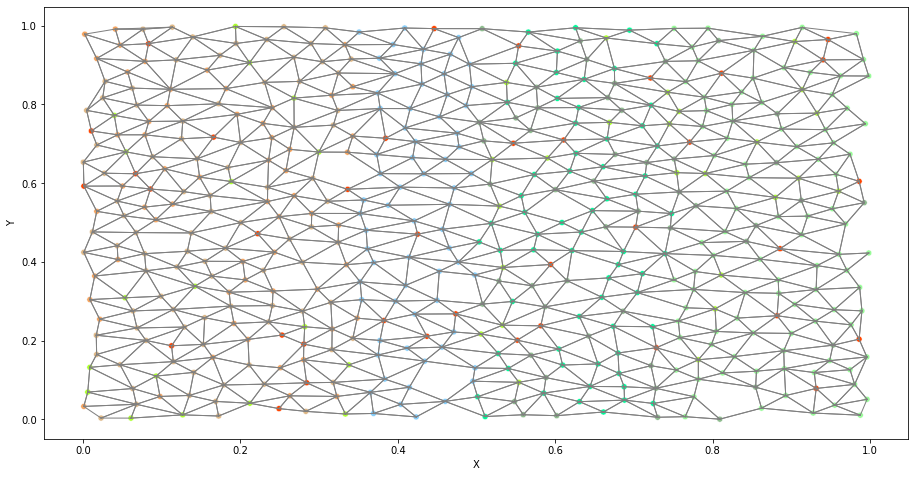

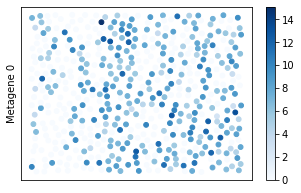

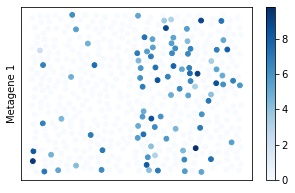

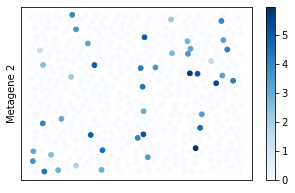

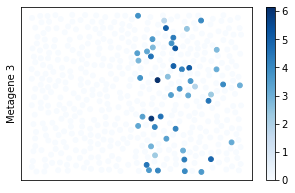

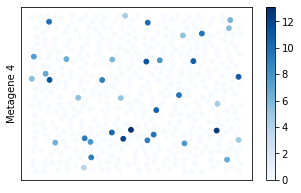

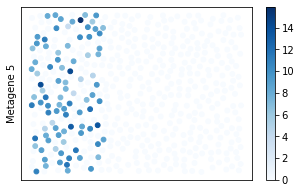

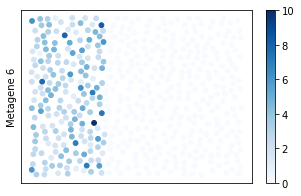

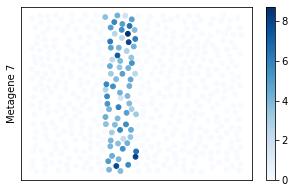

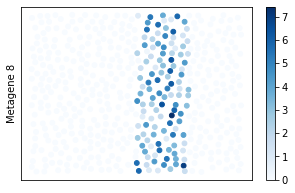

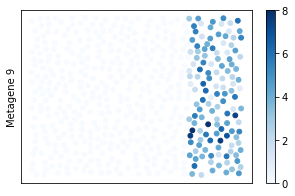

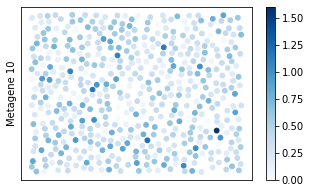

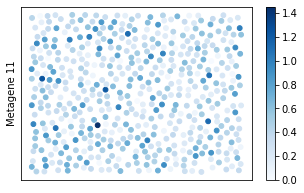

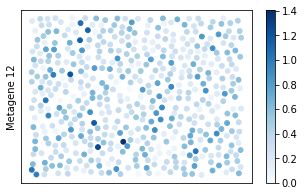

In [6]:
first_dataset = datasets[0]
first_dataset.plot_hidden_states()
first_dataset.plot_cells_UMAP(latent_space=False, annotate=True)
first_dataset.plot_cells_UMAP(latent_space=True, annotate=True)
first_dataset.plot_metagenes()
first_dataset.plot_cell_types()
first_dataset.plot_metagenes_in_situ()